In [72]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [81]:
#Load data from csv
df = pd.read_csv('data/Cloud_SQL_Export_2023-11-28 (17_21_59).csv')

# extract column 0-5, 10-11, 13-15
df = df.iloc[:, [1, 2, 3, 4, 5, 10, 11, 13, 14, 15, 19]]

# remove column 6, 7, 8, 9
#df = df.drop(df.columns[[6, 7, 8, 9, 12, 16, 17, 18]], axis=1)

# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

,FR,NOIR,48800,2020,private,lost_lead,2020-11-10 00:00:00+00,Kia,e-Niro,Active 64 kWh,Unnamed: 19
0,FR,Grise,35750,2019,private,offer_given,2019-06-20 00:00:00+00,Tesla,Model 3,Long Range RWD (2019),41000.0
1,FR,BLANC,18800,2021,private,offer_given,2021-12-06 00:00:00+00,Hyundai,IONIQ 5,Intuitive 58 kWh,35000.0
2,DE,Grey,2800,2021,private,offer_given,2021-10-14 00:00:00+00,VW,ID.3,City 45 kWh (145 ch),23000.0
3,DE,uranograu,34000,2020,private,offer_given,2020-08-27 00:00:00+00,VW,e-Golf,Lim. e-Golf (136 PS),18000.0
4,DE,Weiss,16000,2022,private,offer_given,2022-12-08 00:00:00+00,Tesla,Model Y,Performance,45000.0


In [82]:
# set column headers
df.columns = ['countryCode', 'colour', 'mileage', 'year', 'ownership', 'status', 'registrationDate', 'make', 'model', 'version', "priceInEuros"]
df.head()

,countryCode,colour,mileage,year,ownership,status,registrationDate,make,model,version,priceInEuros
0,FR,Grise,35750,2019,private,offer_given,2019-06-20 00:00:00+00,Tesla,Model 3,Long Range RWD (2019),41000.0
1,FR,BLANC,18800,2021,private,offer_given,2021-12-06 00:00:00+00,Hyundai,IONIQ 5,Intuitive 58 kWh,35000.0
2,DE,Grey,2800,2021,private,offer_given,2021-10-14 00:00:00+00,VW,ID.3,City 45 kWh (145 ch),23000.0
3,DE,uranograu,34000,2020,private,offer_given,2020-08-27 00:00:00+00,VW,e-Golf,Lim. e-Golf (136 PS),18000.0
4,DE,Weiss,16000,2022,private,offer_given,2022-12-08 00:00:00+00,Tesla,Model Y,Performance,45000.0


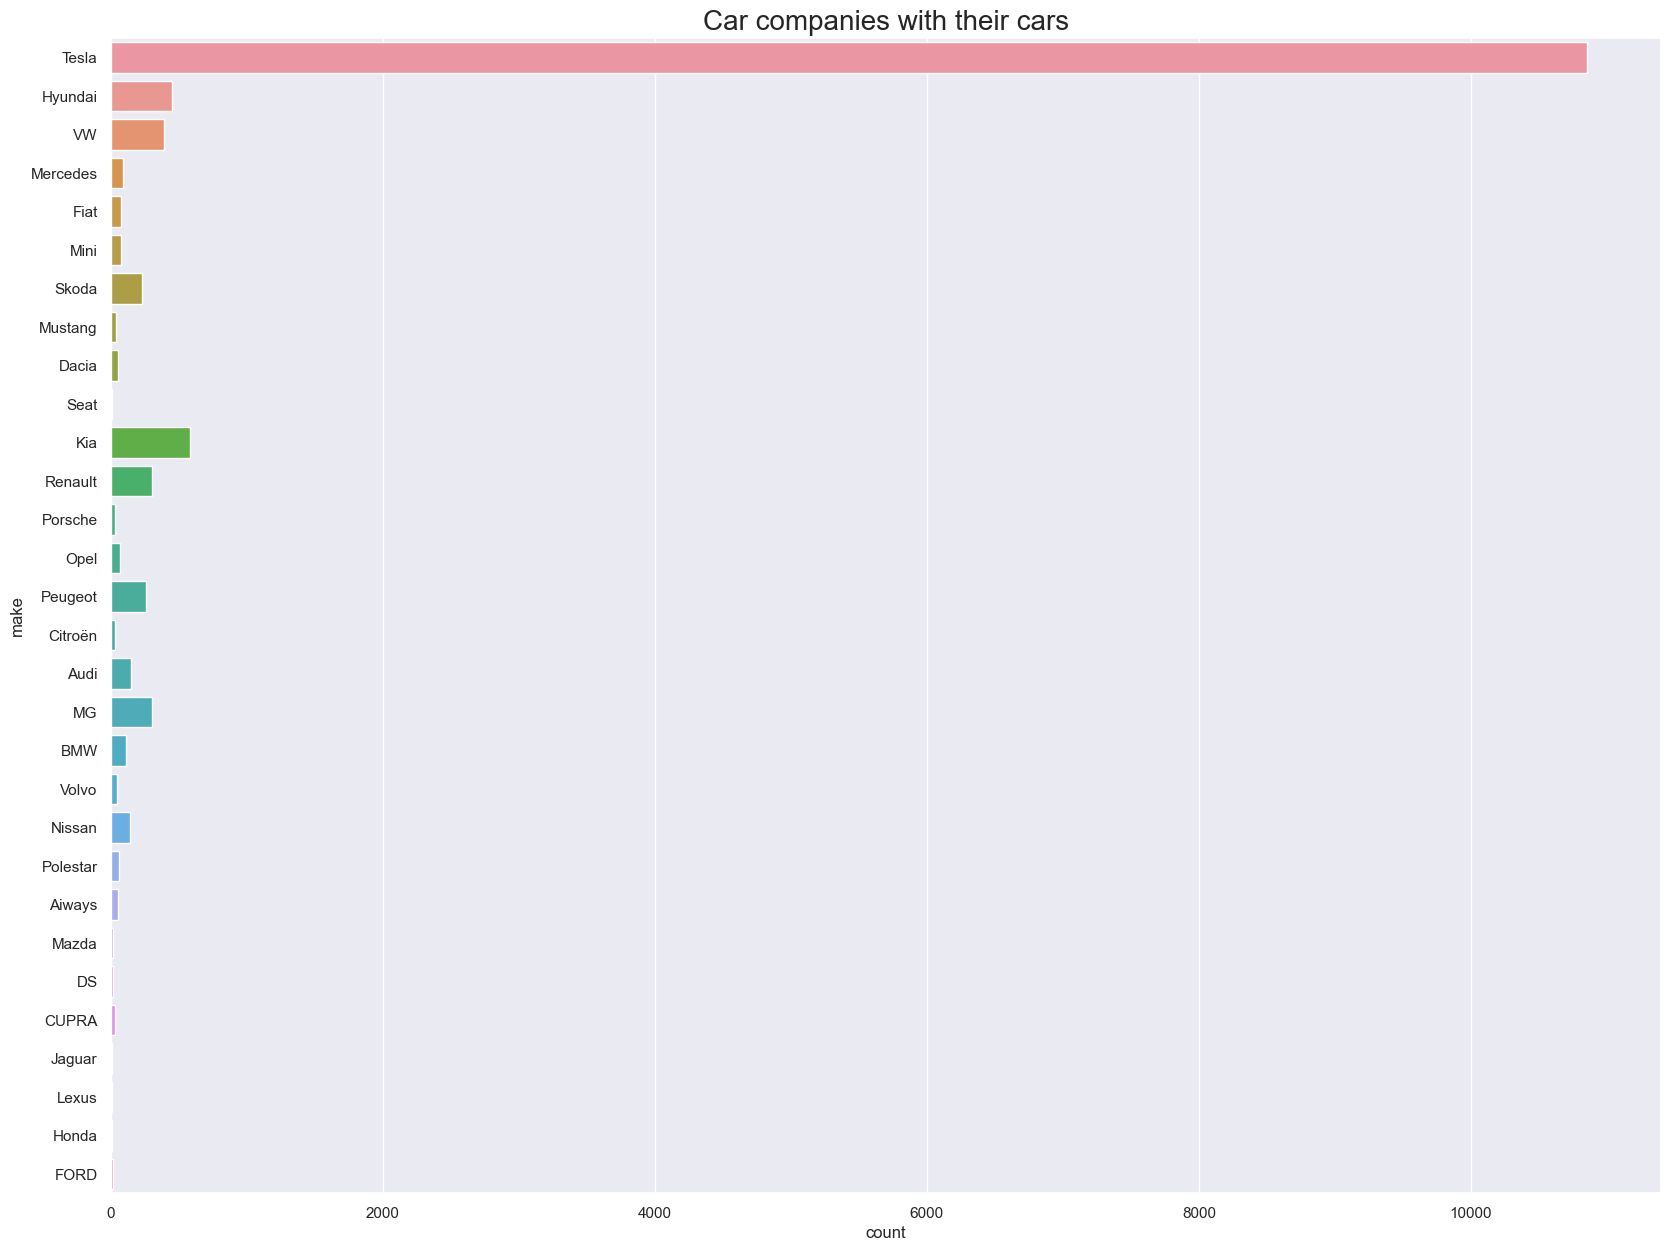

In [83]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

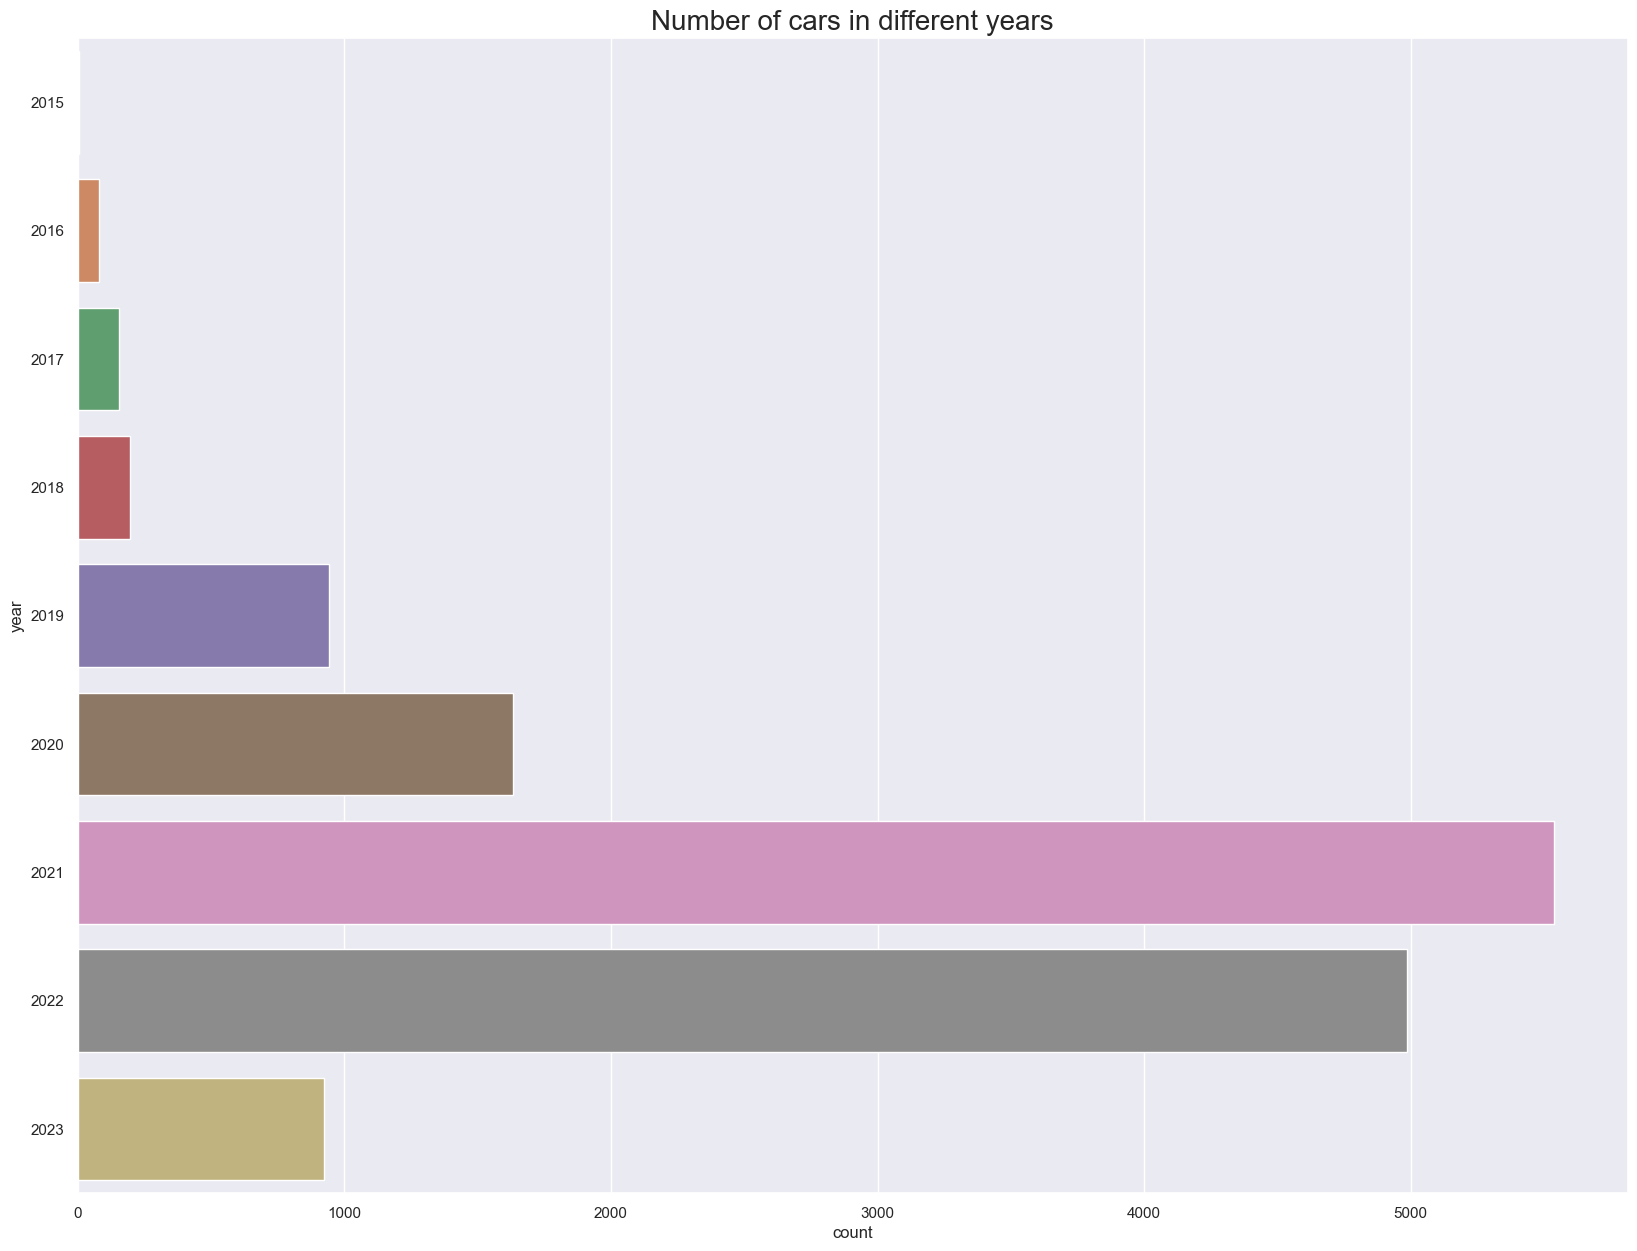

In [76]:

#Number of cars in different years
plt.figure(figsize = (20, 15))
sns.countplot(y = df.year)
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

<Axes: >

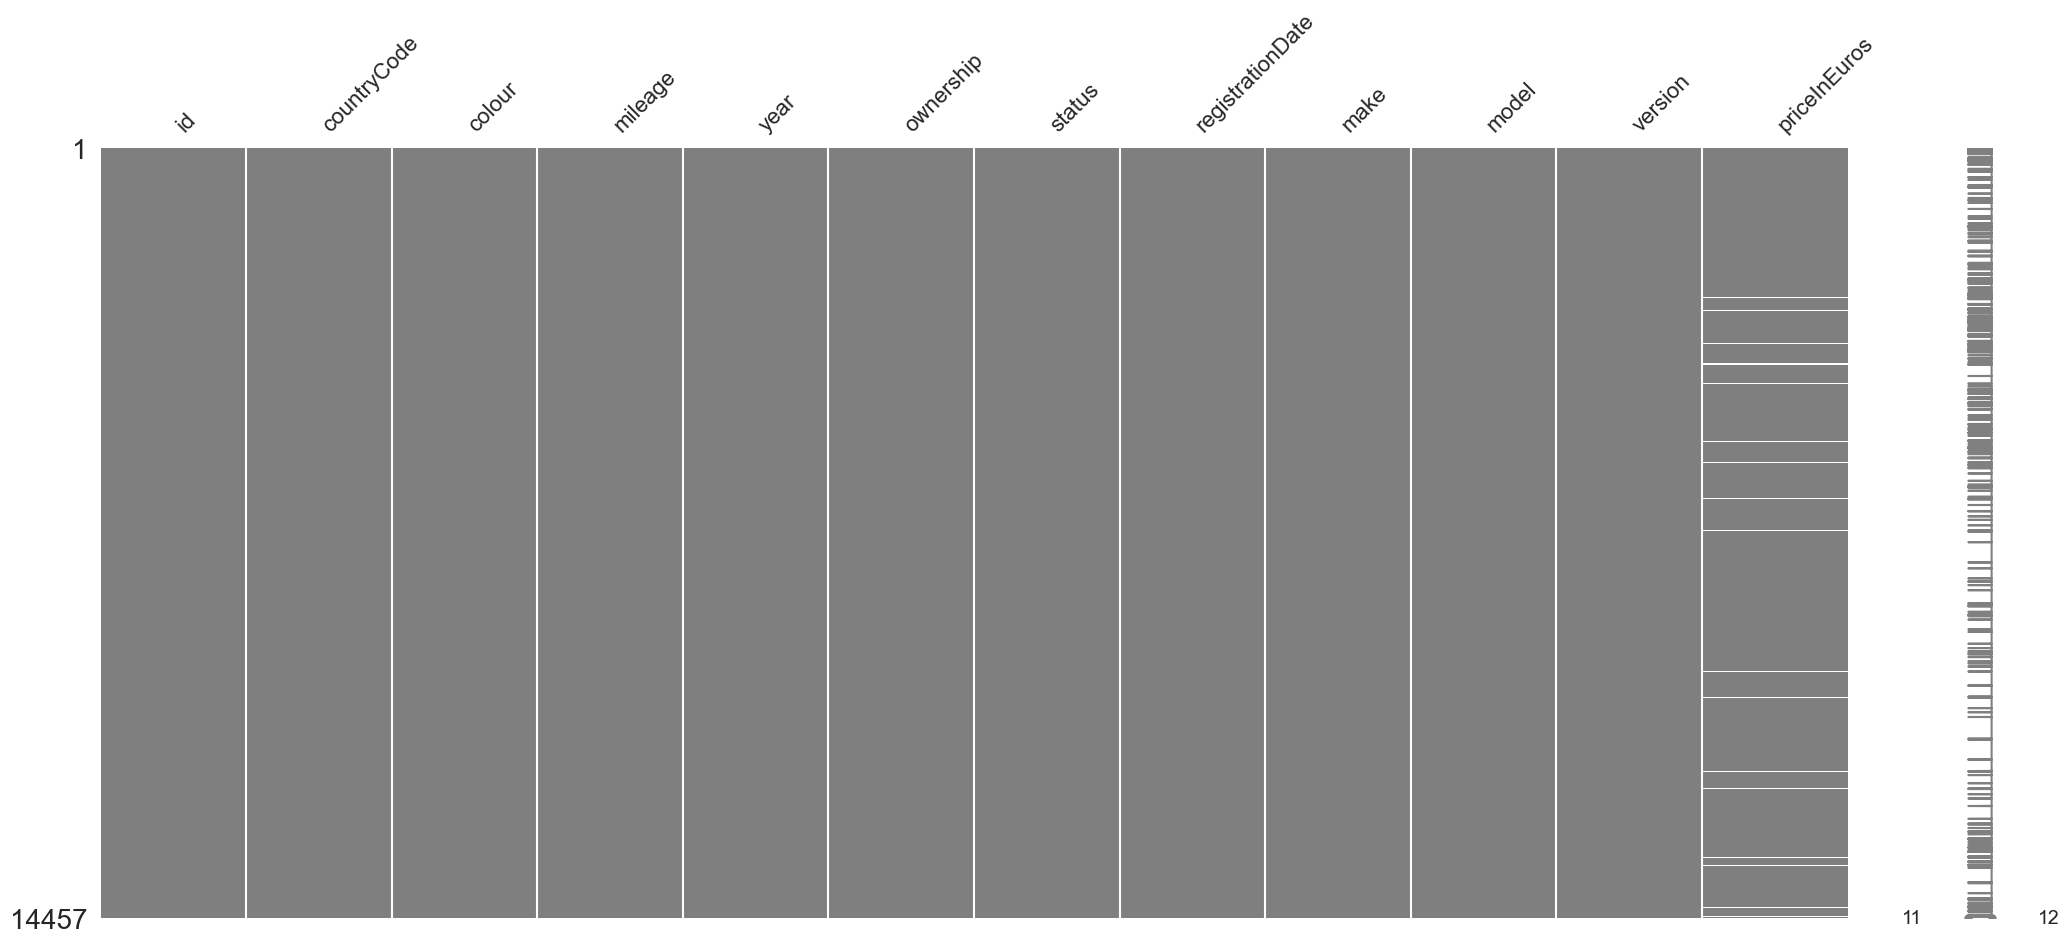

In [46]:
# where nulls are
msno.matrix(df, color = (0.5, 0.5, 0.5))


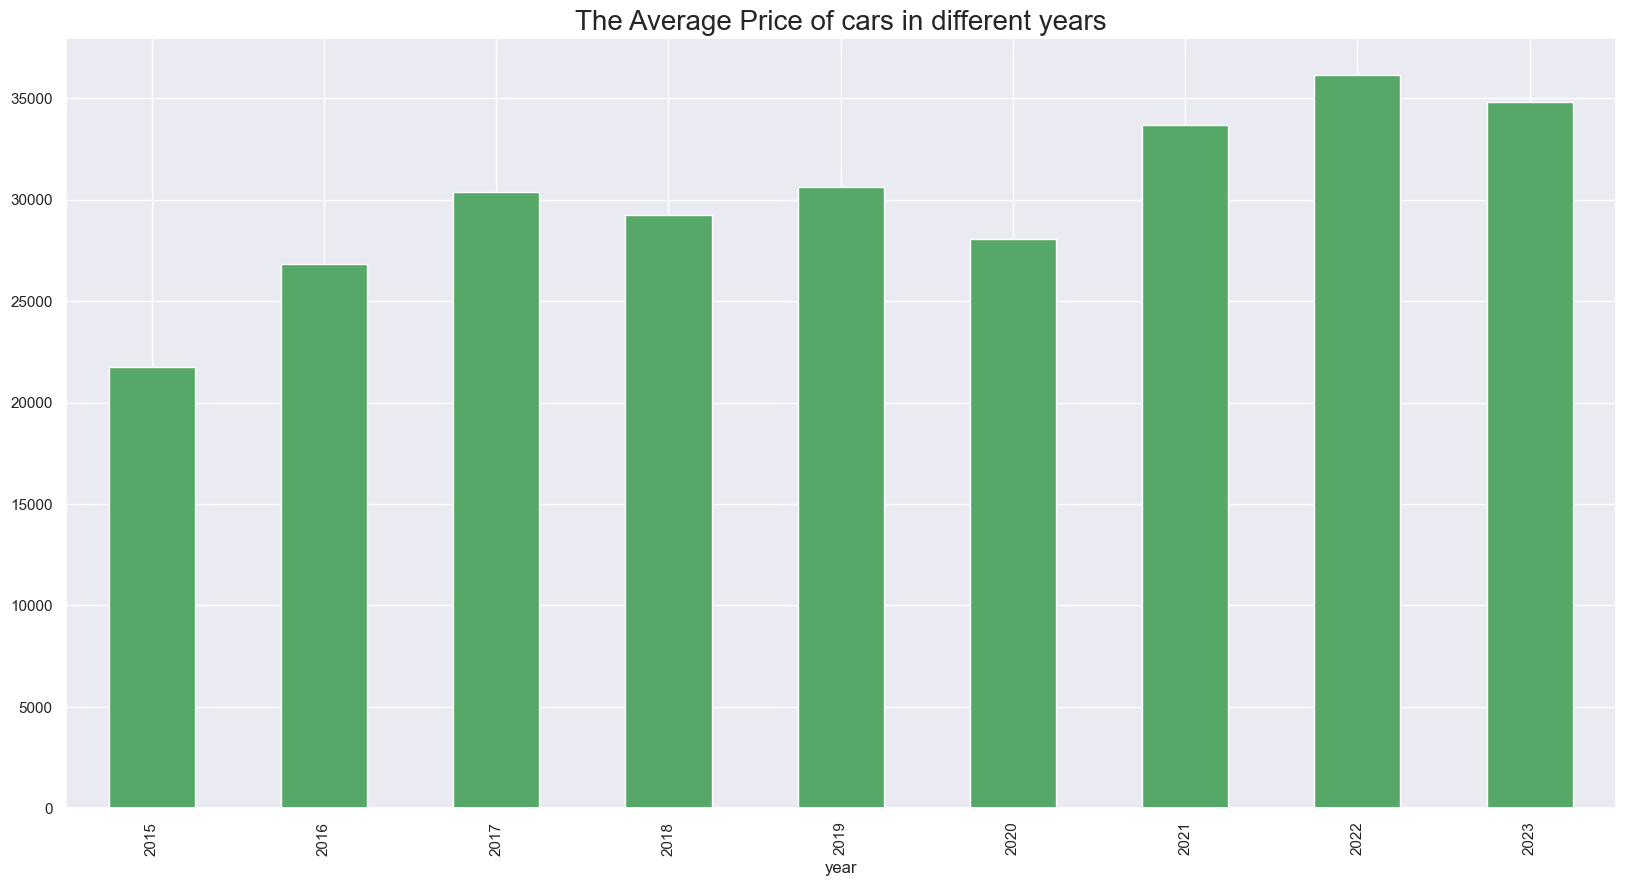

In [48]:

plt.figure(figsize = (20, 10))
df.groupby('year')['priceInEuros'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

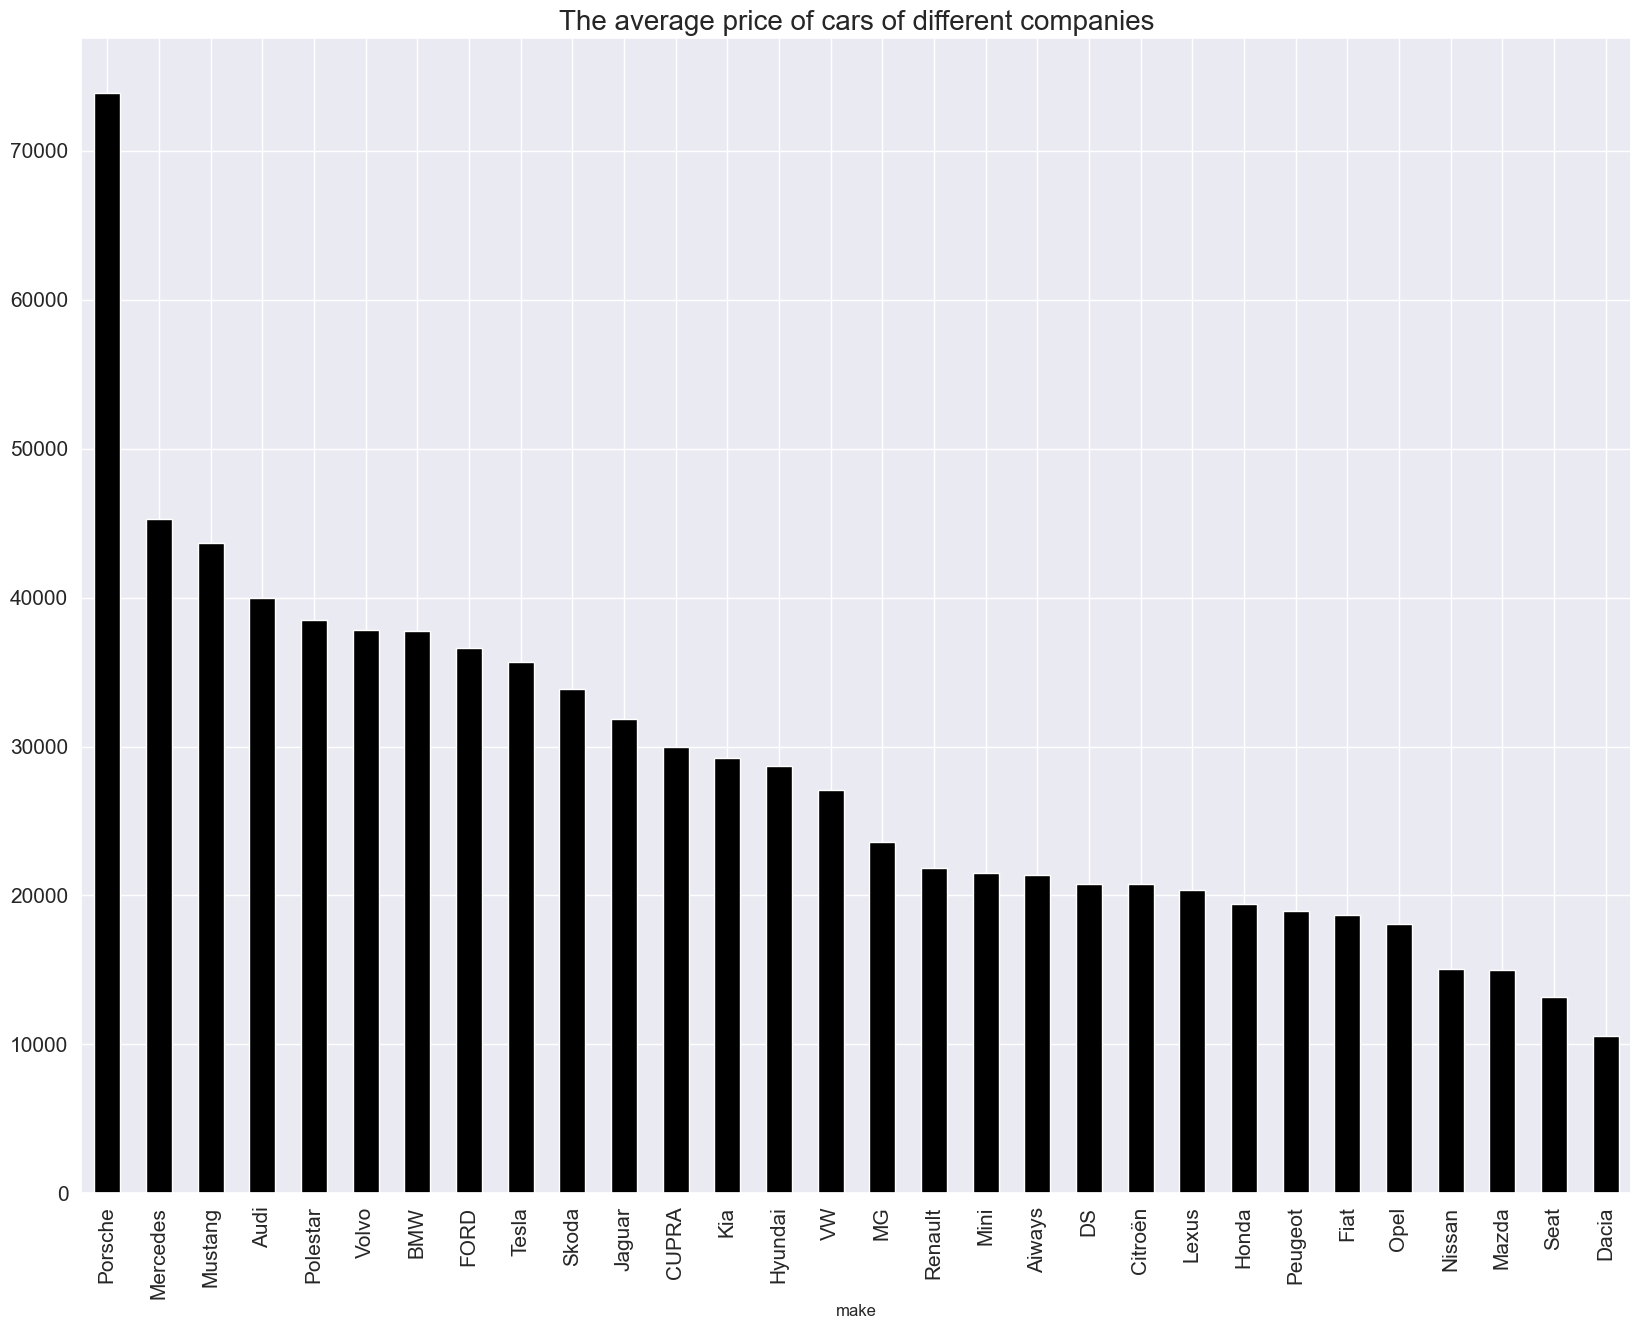

In [50]:
plt.figure(figsize = (20, 15))
df.groupby(['make']).mean()['priceInEuros'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'black')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()

In [55]:
#numeric_columns = ['make', 'model', 'version', 'priceInEuros', 'mileage', 'year', 'colour' , 'ownership', 'status', 'registrationDate']
#heatmap_data = df[numeric_columns].corr()

#sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

### Data preprocessing

In [84]:
# shuffle and divide data
shuffled_data = shuffle(df, random_state = 100)
X = shuffled_data.drop(['priceInEuros'], axis = 1)
y = shuffled_data['priceInEuros']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)


In [89]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))


The size of the input train data is: (11565, 10)
The size of the output train data is: (11565,)
The size of the input test data is: (2892, 10)
The size of the output test data is: (2892,)


In [80]:
encoder = TargetEncoder(cols = 'make')
encoder.fit(X_train['make'], y_train.to_frame()['priceInEuros'])
X_train['make'] = encoder.transform(X_train['make'])
X_test['make'] = encoder.transform(X_test['make'])
X_train.head()


,id,countryCode,colour,mileage,year,ownership,status,registrationDate,make,model,version
12056,75759a35-244d-4b43-9479-fa7d29d29455,FR,red,12300,2022,private,offer_given,2022-09-19 00:00:00+00,35681.347934,Model 3,Performance 82kWh (2021-2022)
12042,02561637-32b3-4d1a-adfa-16b9ab78337a,FR,white,25000,2021,private,offer_declined,2021-08-24 00:00:00+00,27337.500000,e-up!,e-up! (83 ch)
841,debf3494-4114-4598-ba0a-f1d05bee8f4c,FR,gray,43500,2021,private,offer_given,2021-09-29 00:00:00+00,35681.347934,Model 3,Long Range Refresh (2021-2022)
8560,2f20b0a2-9959-4ae8-ab2f-a566a569cc7d,DE,Weiß,22500,2022,businessCar,offer_given,2022-02-19 00:00:00+00,35681.347934,Model 3,Model 3 60kWh (2022)
7301,6e934768-56b8-490e-87fa-0a605e69425e,FR,BLANC,156000,2018,private,offer_given,2018-07-16 00:00:00+00,35681.347934,Model S,100D AWD (2017-2019)


In [90]:
# add present year
df['Present Year'] = 2023
df['Years Of Manufacture'] = df['Present Year'] - df['year']
df.drop(['Present Year'], inplace = True, axis = 1)

In [92]:
# Transform categorical data to numerical data 
encoder = TargetEncoder(cols = 'year')
encoder.fit(X_train['year'], y_train.to_frame()['priceInEuros'] )
X_train['year'] = encoder.transform(X_train['year'])
X_test['year'] = encoder.transform(X_test['year'])
X_train.head()




,countryCode,colour,mileage,year,ownership,status,registrationDate,make,model,version
12056,FR,red,12300,36140.138796,private,offer_given,2022-09-19 00:00:00+00,Tesla,Model 3,Performance 82kWh (2021-2022)
12042,FR,white,25000,33673.204519,private,offer_declined,2021-08-24 00:00:00+00,VW,e-up!,e-up! (83 ch)
841,FR,gray,43500,33673.204519,private,offer_given,2021-09-29 00:00:00+00,Tesla,Model 3,Long Range Refresh (2021-2022)
8560,DE,Weiß,22500,36140.138796,businessCar,offer_given,2022-02-19 00:00:00+00,Tesla,Model 3,Model 3 60kWh (2022)
7301,FR,BLANC,156000,29750.540807,private,offer_given,2018-07-16 00:00:00+00,Tesla,Model S,100D AWD (2017-2019)


In [ ]:
# One hot encoding for categorical variables
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
